In [1]:
# learn how to do plot customization via 
import pandas as pd 
import seaborn as sns
import numpy as np

# my turn: lets do the usual immediate explorations including the categorical vars
diamonds = sns.load_dataset('diamonds')
diamonds.describe() # notice shape, unit, key, etc...

# my turn: explore carats - how many are 0.99 vs 1 carat? why?
# sns.distplot(diamonds['carat'], kde=False, bins=np.arange(0.2,2.05,.05).tolist())
sns.distplot(diamonds['carat'])


# explore dist of x, y, z: what did you learn? which is width, length, depth?

# your turn: explore price - is there anything unusual? (HINT: try many bin widths)
#used box plot 
# my turn: how is carat related to price?
# scatter or line plot 
# your turn: how is price related to cut?

# how should we deal with outliers? delete obs? replace with nan? winsorize? show each...

 

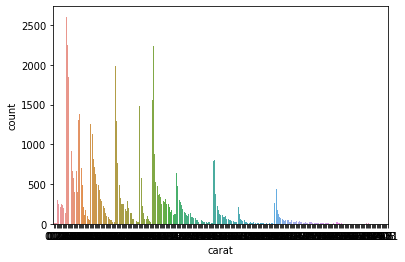

In [2]:
sns.countplot(diamonds['carat'])

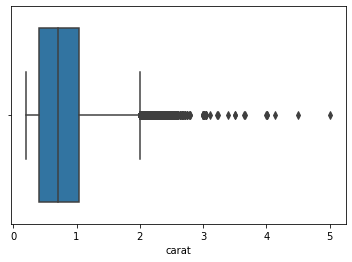

In [3]:
sns.boxplot(x='carat', data=diamonds)
# shows that there are many outliers 

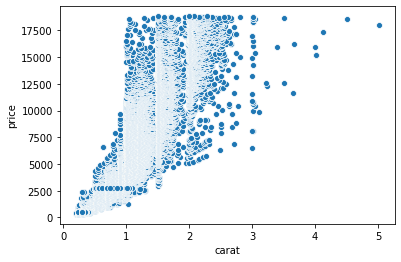

In [4]:
sns.scatterplot(data = diamonds, x='carat', y='price')

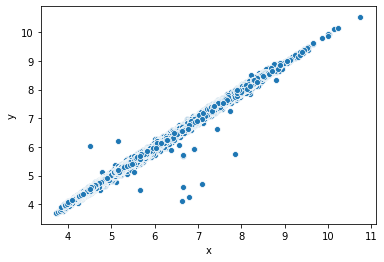

In [5]:
sns.scatterplot(data = diamonds.query('y<20 & x>2.5'), x='x', y='y')

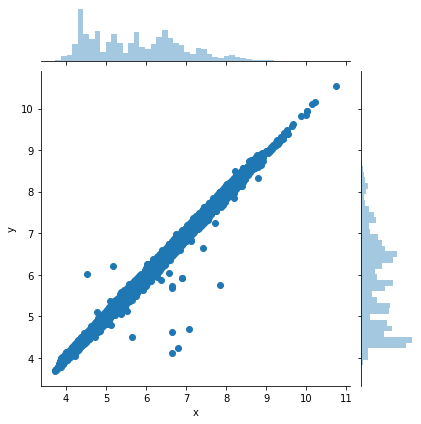

In [6]:
sns.jointplot(data = diamonds.query('y<20 & x>2.5'), x='x', y='y')

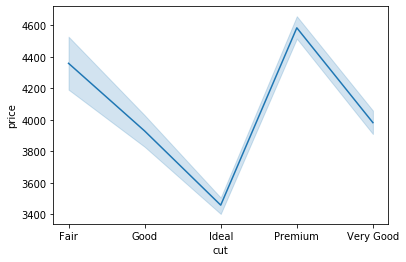

In [7]:
sns.lineplot(data = diamonds, x='cut', y='price')

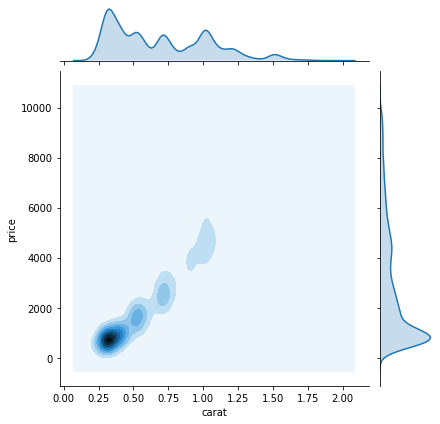

In [8]:
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), x ="carat", y ="price",kind="kde")

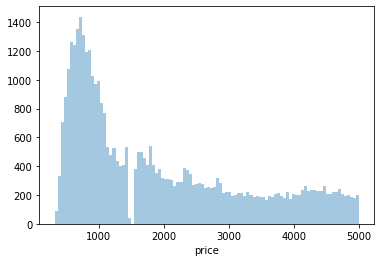

In [9]:
sns.distplot(diamonds.query('price<5000')['price'], kde=False,bins=100)

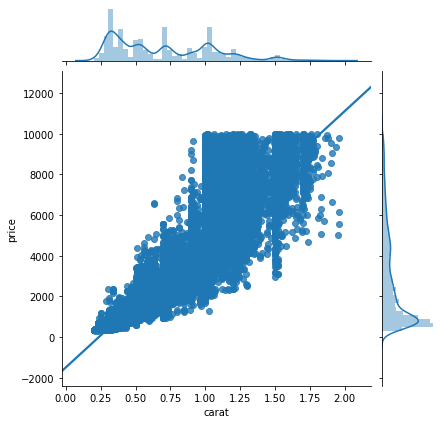

In [10]:
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), x ="carat", y ="price",kind="reg")

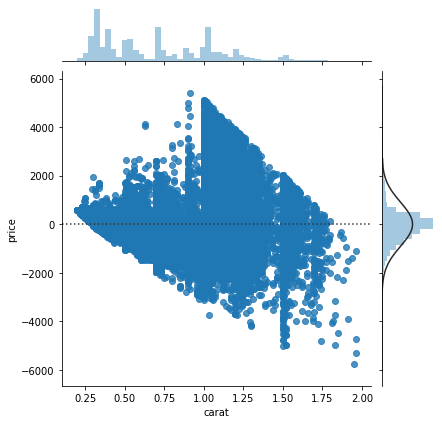

In [11]:
#as you get closer to one you are less able to predict price (aka more varibility)
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), x ="carat", y ="price",kind="resid")

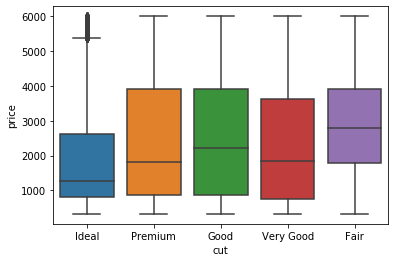

In [12]:
sns.boxplot(data = diamonds.query('price < 6000'), x='cut', y='price')
# make sure to order on quality 

# VIZ Practice

In [13]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

stocks = ['AAPL','MSFT','VZ']
start_yr = 2000

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
# print(stock_prices.head())
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
print(stock_prices.head())
stock_prices.columns = stocks # put their tickers as column names
stock_prices.head() # print

Attributes Adj Close                      
Symbols         AAPL       MSFT         VZ
Date                                      
2000-01-03  3.470226  37.495686  20.721500
2000-01-04  3.177650  36.229057  20.051672
2000-01-05  3.224152  36.611080  20.721500
2000-01-06  2.945139  35.384666  20.631170
2000-01-07  3.084645  35.847076  20.478834


,AAPL,MSFT,VZ
Date,,,
2000-01-03,3.470226,37.495686,20.721500
2000-01-04,3.177650,36.229057,20.051672
2000-01-05,3.224152,36.611080,20.721500
2000-01-06,2.945139,35.384666,20.631170
2000-01-07,3.084645,35.847076,20.478834


# This is wide data... so if we want to create a new variable, we have to do it once for each firm... --> convert to LONG DATA!


In [14]:
# make long/tidy:
stock_prices = stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns = ['Firm','Date','Adj Close']
stock_prices.head() # print - now that is formatted nicely, like CRSP! 

# note: we might have to tweak the regression section of "Simple Program"
# to work with the long data, but I suspect that it would be shorter code and 
# more "generally applicable" (ie easily work with N=1000+ firms)

,Firm,Date,Adj Close
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645


In [15]:
stock_prices['ret'] = stock_prices.groupby('Firm')['Adj Close'].pct_change()
print(stock_prices.head())

   Firm       Date  Adj Close       ret
0  AAPL 2000-01-03   3.470226       NaN
1  AAPL 2000-01-04   3.177650 -0.084310
2  AAPL 2000-01-05   3.224152  0.014634
3  AAPL 2000-01-06   2.945139 -0.086538
4  AAPL 2000-01-07   3.084645  0.047368


# Transpose

In [16]:
stock_prices.groupby('Firm')['ret'].describe().transpose()

Firm,AAPL,MSFT,VZ
count,5062.000000,5062.000000,5062.000000
mean,0.001229,0.000497,0.000321
std,0.025349,0.018964,0.015347
min,-0.518692,-0.155977,-0.118461
25%,-0.010330,-0.008038,-0.007248
50%,0.000895,0.000338,0.000369
75%,0.012943,0.008928,0.007702
max,0.139049,0.195652,0.146324


In [17]:
# stock_prices.query('Firm == "VZ"')

#number of missing observations in ret 
# stock_prices['ret'].isna().sum()

stock_prices.query('ret == "NaN"').count()

Firm         3
Date         3
Adj Close    3
ret          0
dtype: int64

In [18]:
help(stock_prices['ret'].isnull)

Help on method isnull in module pandas.core.series:

isnull() method of pandas.core.series.Series instance
    Detect missing values.
    
    Return a boolean same-sized object indicating if the values are NA.
    NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
    values.
    Everything else gets mapped to False values. Characters such as empty
    strings ``''`` or :attr:`numpy.inf` are not considered NA values
    (unless you set ``pandas.options.mode.use_inf_as_na = True``).
    
    Returns
    -------
    Series
        Mask of bool values for each element in Series that
        indicates whether an element is not an NA value.
    
    See Also
    --------
    Series.isnull : Alias of isna.
    Series.notna : Boolean inverse of isna.
    Series.dropna : Omit axes labels with missing values.
    isna : Top-level isna.
    
    Examples
    --------
    Show which entries in a DataFrame are NA.
    
    >>> df = pd.DataFrame({'age': [5, 6, np.NaN],
    ...      

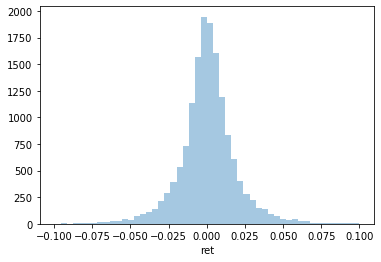

In [27]:
#histo, boxplot, daily stock returns 
# distplot cant deal with NaN
# sns.distplot(stock_prices['ret'].dropna(), kde=False)
sns.distplot(stock_prices.query('abs(ret)<.1')['ret'].dropna(), kde=False)

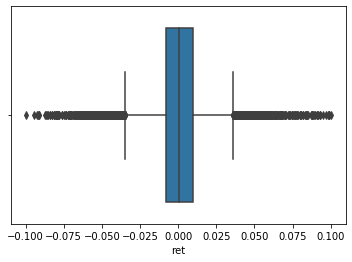

In [31]:
# sns.boxplot(data =stock_prices, x='ret')
sns.boxplot(data =stock_prices.query('abs(ret)<.1'), x='ret')

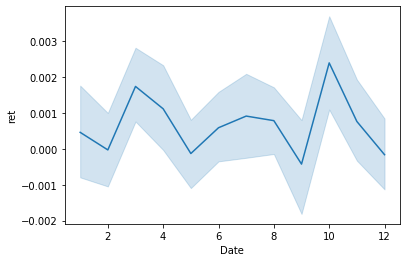

In [33]:
# sns.lineplot(data=stock_prices, x='Date', y='ret', hue='Firm')
sns.lineplot(data=stock_prices, x=stock_prices['Date'].dt.month, y='ret')



#this is taking long because its plotting for each day in the year. mabye make buckets bigger 
# by plotting by month 